In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('EEG_data.csv')
df.head()

SubjectID  VideoID  Attention  Mediation    Raw      Delta     Theta  \
0        0.0      0.0       56.0       43.0  278.0   301963.0   90612.0   
1        0.0      0.0       40.0       35.0  -50.0    73787.0   28083.0   
2        0.0      0.0       47.0       48.0  101.0   758353.0  383745.0   
3        0.0      0.0       47.0       57.0   -5.0  2012240.0  129350.0   
4        0.0      0.0       44.0       53.0   -8.0  1005145.0  354328.0   

     Alpha1   Alpha2    Beta1     Beta2   Gamma1   Gamma2  predefinedlabel  \
0   33735.0  23991.0  27946.0   45097.0  33228.0   8293.0              0.0   
1    1439.0   2240.0   2746.0    3687.0   5293.0   2740.0              0.0   
2  201999.0  62107.0  36293.0  130536.0  57243.0  25354.0              0.0   
3   61236.0  17084.0  11488.0   62462.0  49960.0  33932.0              0.0   
4   37102.0  88881.0  45307.0   99603.0  44790.0  29749.0              0.0   

   user-definedlabeln  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [3]:
df.shape

(12811, 15)

In [4]:
df.columns

Index(['SubjectID', 'VideoID', 'Attention', 'Mediation', 'Raw', 'Delta',
       'Theta', 'Alpha1', 'Alpha2', 'Beta1', 'Beta2', 'Gamma1', 'Gamma2',
       'predefinedlabel', 'user-definedlabeln'],
      dtype='object')

In [22]:
# Added timepoint to the data
df_new = df.reset_index().drop(df.index)

for i in range(0,10):
  for j in range(0,10):
    query = "SubjectID == "+str(i)+" & VideoID == "+str(j)
    df_temp = df.query(query)
    df_temp = df_temp.reset_index(drop=True)
    df_temp = df_temp.reset_index()
    df_new = pd.concat([df_new, df_temp])

df_new = df_new.rename(columns={"index": "timepoint"})
df_new = df_new.reset_index(drop=True)

# Change the SubjectID and VideoID columns to integer strings for easy labeling
df_new['SubjectID'] = df_new['SubjectID'].astype(int).astype(str)
df_new['VideoID'] = df_new['VideoID'].astype(int).astype(str)

df_new.head()

timepoint SubjectID VideoID  Attention  Mediation    Raw      Delta  \
0          0         0       0       56.0       43.0  278.0   301963.0   
1          1         0       0       40.0       35.0  -50.0    73787.0   
2          2         0       0       47.0       48.0  101.0   758353.0   
3          3         0       0       47.0       57.0   -5.0  2012240.0   
4          4         0       0       44.0       53.0   -8.0  1005145.0   

      Theta    Alpha1   Alpha2    Beta1     Beta2   Gamma1   Gamma2  \
0   90612.0   33735.0  23991.0  27946.0   45097.0  33228.0   8293.0   
1   28083.0    1439.0   2240.0   2746.0    3687.0   5293.0   2740.0   
2  383745.0  201999.0  62107.0  36293.0  130536.0  57243.0  25354.0   
3  129350.0   61236.0  17084.0  11488.0   62462.0  49960.0  33932.0   
4  354328.0   37102.0  88881.0  45307.0   99603.0  44790.0  29749.0   

   predefinedlabel  user-definedlabeln  
0              0.0                 0.0  
1              0.0                 0.0  
2              0.0                 0.0  
3              0.0                 0.0  
4              0.0                 0.0

In [23]:
df_new['SubjectID'].unique()

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [6]:
# Seperating the dataframe by which the participants marked as confused ('user-definedlabeln' == 1) or understood ('user-definedlabeln' == 0)
df_confused = df_new[df_new['user-definedlabeln'] == 1]
df_understood = df_new[df_new['user-definedlabeln'] == 0]

Average Attention VideoID 1: 43.621428571428574
Average Attention VideoID 2: 43.978873239436616
Average Attention VideoID 5: 49.8130081300813
Average Attention VideoID 6: 33.58620689655172
Average Attention VideoID 8: 55.54838709677419


<Figure size 1200x800 with 0 Axes>

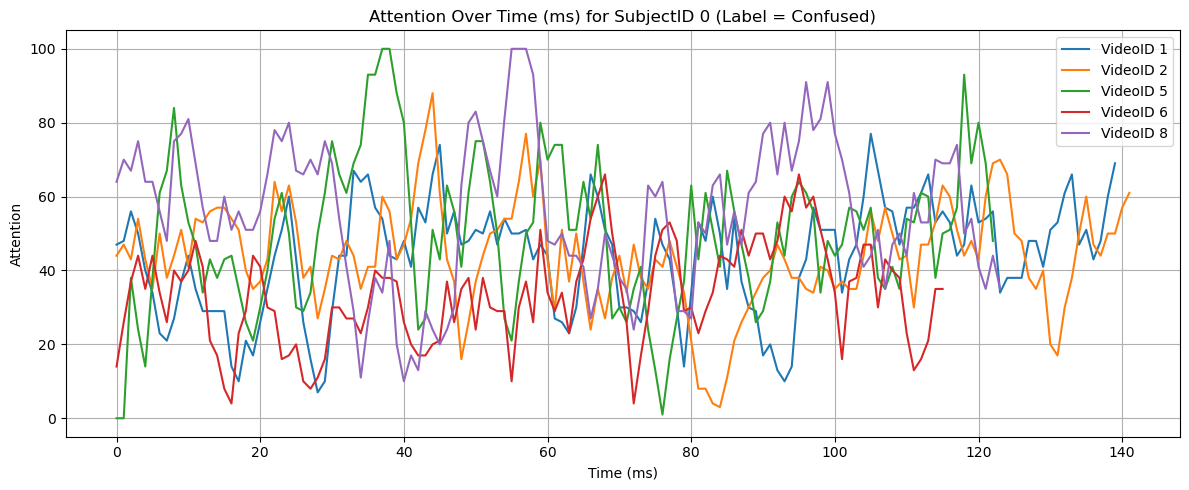

Average Mediation VideoID 1: 48.621428571428574
Average Mediation VideoID 2: 47.316901408450704
Average Mediation VideoID 5: 41.048780487804876
Average Mediation VideoID 6: 44.310344827586206
Average Mediation VideoID 8: 52.87903225806452


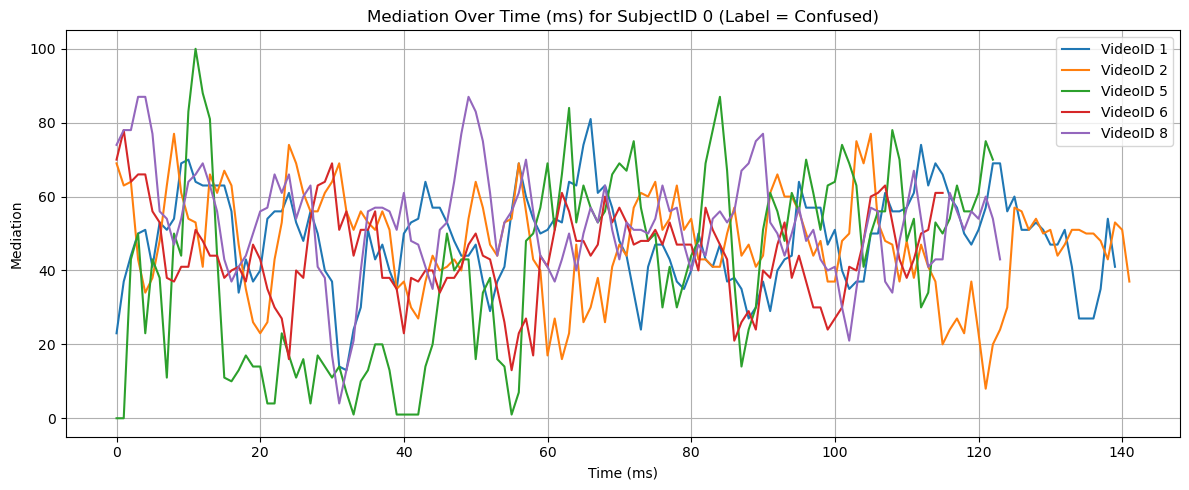

Average Raw VideoID 1: 28.8
Average Raw VideoID 2: 13.154929577464788
Average Raw VideoID 5: 38.80487804878049
Average Raw VideoID 6: 44.224137931034484
Average Raw VideoID 8: 29.56451612903226


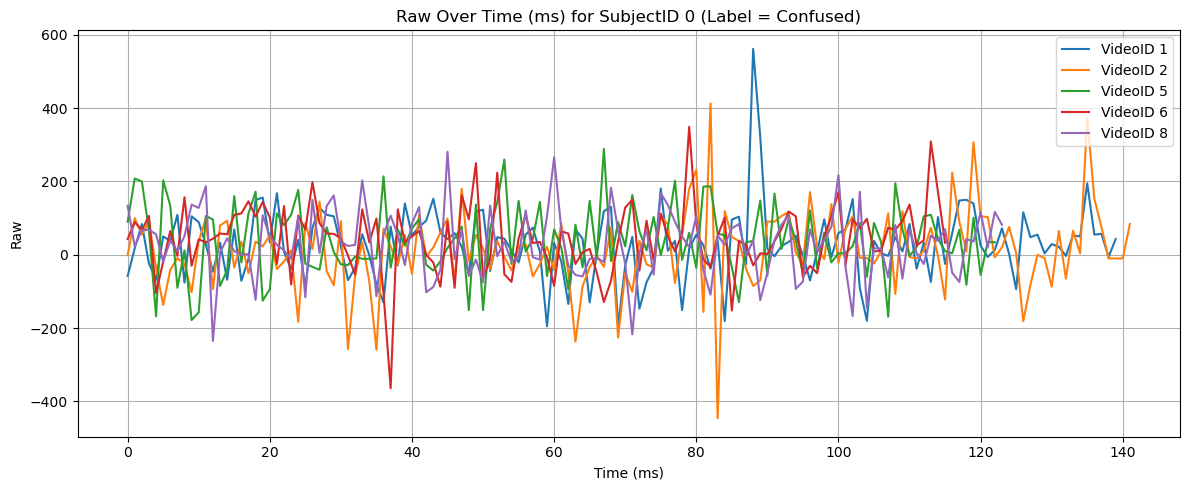

Average Delta VideoID 1: 739737.2928571429
Average Delta VideoID 2: 694078.0845070423
Average Delta VideoID 5: 935209.0487804879
Average Delta VideoID 6: 785092.6034482758
Average Delta VideoID 8: 914415.4596774194


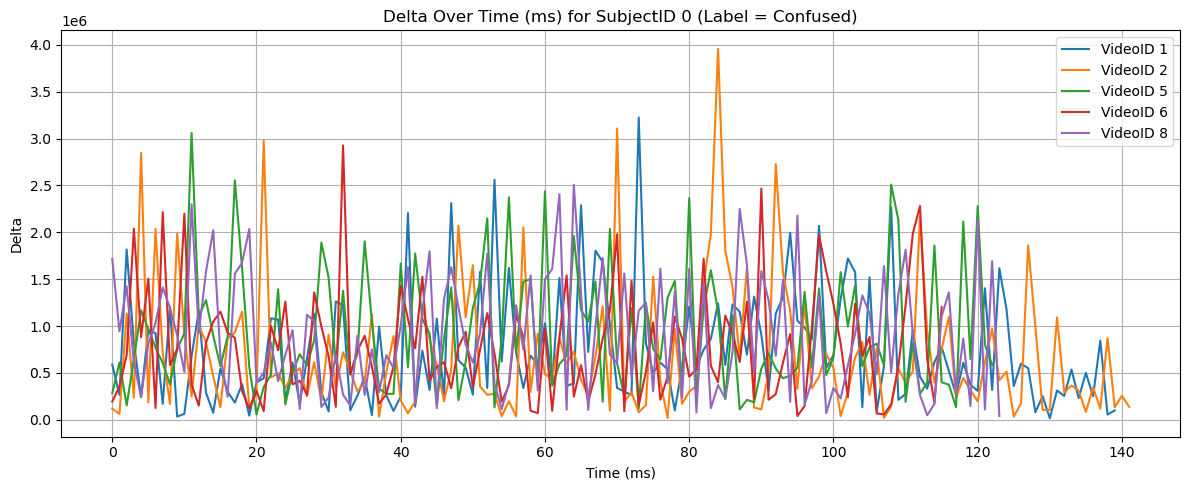

Average Theta VideoID 1: 161064.22857142857
Average Theta VideoID 2: 149816.87323943662
Average Theta VideoID 5: 282487.51219512196
Average Theta VideoID 6: 212861.87931034484
Average Theta VideoID 8: 198926.0483870968


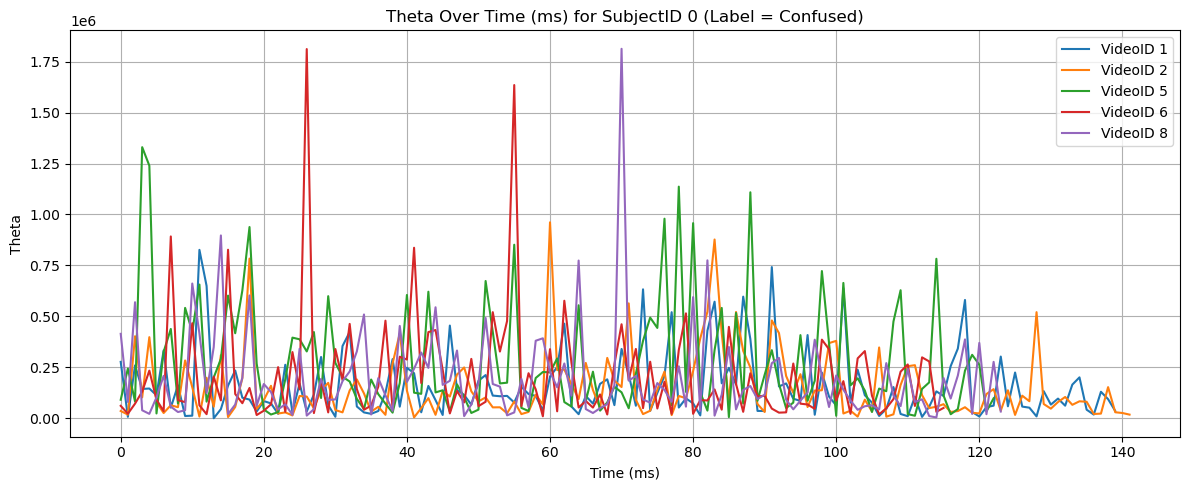

Average Alpha1 VideoID 1: 34918.02857142857
Average Alpha1 VideoID 2: 30493.87323943662
Average Alpha1 VideoID 5: 70498.08943089431
Average Alpha1 VideoID 6: 35401.0
Average Alpha1 VideoID 8: 42279.81451612903


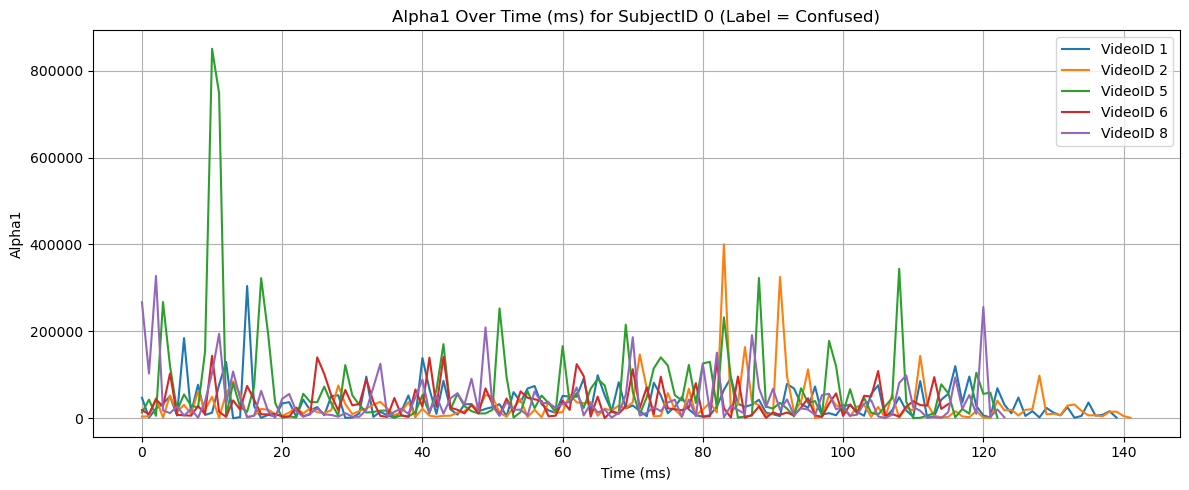

Average Alpha2 VideoID 1: 25078.935714285715
Average Alpha2 VideoID 2: 21667.591549295776
Average Alpha2 VideoID 5: 40760.39837398374
Average Alpha2 VideoID 6: 24325.224137931036
Average Alpha2 VideoID 8: 25929.185483870966


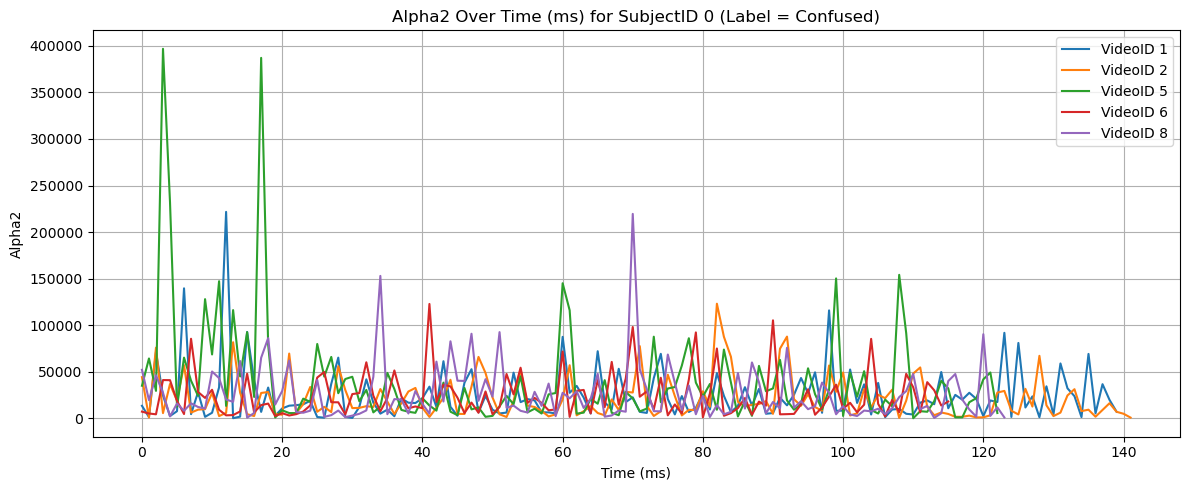

Average Beta1 VideoID 1: 22157.307142857142
Average Beta1 VideoID 2: 21888.338028169015
Average Beta1 VideoID 5: 28621.52845528455
Average Beta1 VideoID 6: 19985.818965517243
Average Beta1 VideoID 8: 20326.217741935485


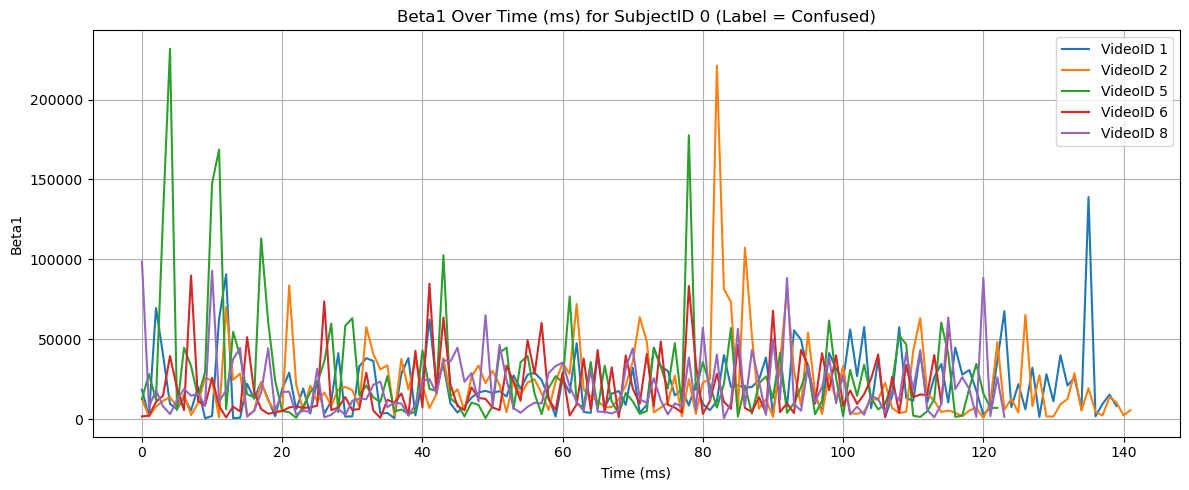

Average Beta2 VideoID 1: 37410.72857142857
Average Beta2 VideoID 2: 36446.43661971831
Average Beta2 VideoID 5: 41453.46341463415
Average Beta2 VideoID 6: 30956.370689655174
Average Beta2 VideoID 8: 36773.4435483871


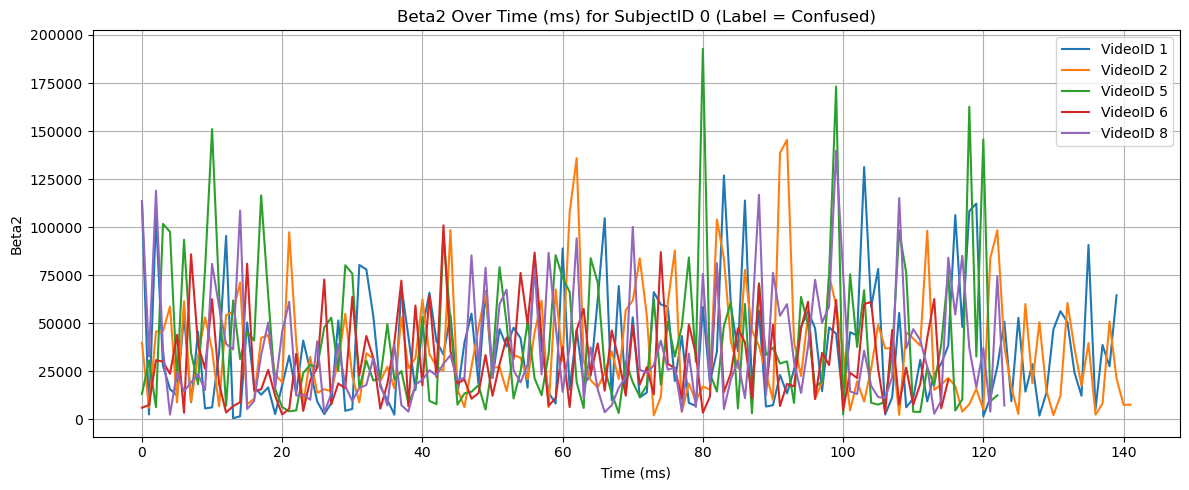

Average Gamma1 VideoID 1: 36758.7
Average Gamma1 VideoID 2: 33908.873239436616
Average Gamma1 VideoID 5: 54069.455284552845
Average Gamma1 VideoID 6: 30169.21551724138
Average Gamma1 VideoID 8: 45424.58870967742


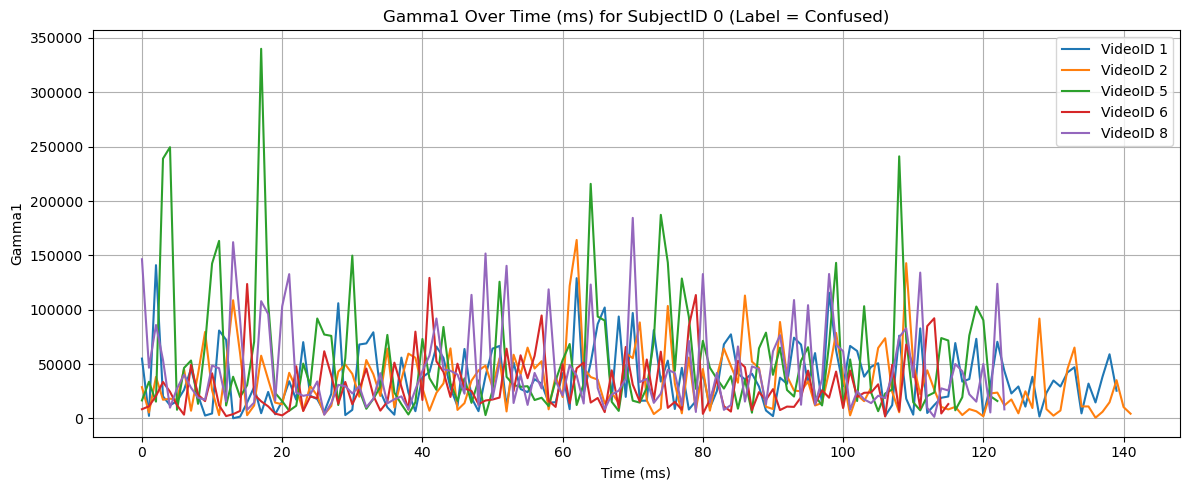

Average Gamma2 VideoID 1: 14519.407142857142
Average Gamma2 VideoID 2: 14545.845070422536
Average Gamma2 VideoID 5: 22656.227642276423
Average Gamma2 VideoID 6: 14366.318965517241
Average Gamma2 VideoID 8: 17554.927419354837


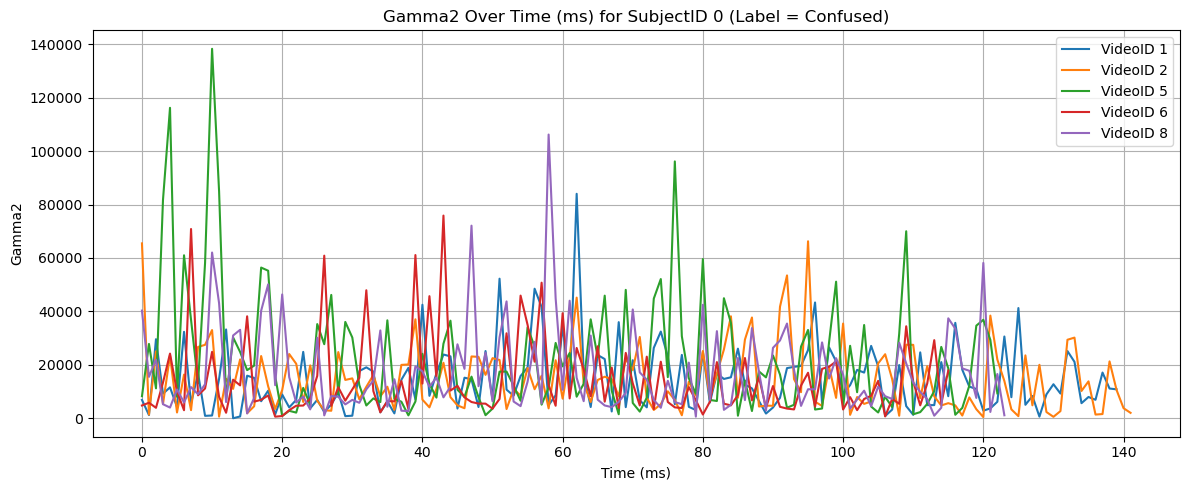

In [21]:
# Plotting each column over time of Subject 0 for confused videos
cols = df_new.columns.tolist()[3:-2]

plt.figure(figsize=(12, 8))

video_ids = df_confused[df_confused['SubjectID'] == '0']['VideoID'].unique()

for col in cols:
    plt.figure(figsize=(12, 5))
    for i in video_ids:
        df_filtered = df_confused[(df_confused['SubjectID'] == '0') & (df_confused['VideoID'] == i)]
        print(f'Average {col} VideoID {i}:', df_filtered[col].mean())
        plt.plot(df_filtered['timepoint'], df_filtered[col], label=f'VideoID {i}')
    
    plt.grid(True)
    plt.xlabel('Time (ms)')
    plt.ylabel(col)
    plt.title(f'{col} Over Time (ms) for SubjectID 0 (Label = Confused)')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

Average Attention VideoID 0: 55.25694444444444
Average Attention VideoID 3: 51.057377049180324
Average Attention VideoID 4: 55.224137931034484
Average Attention VideoID 7: 48.0
Average Attention VideoID 9: 49.9344262295082


<Figure size 1200x800 with 0 Axes>

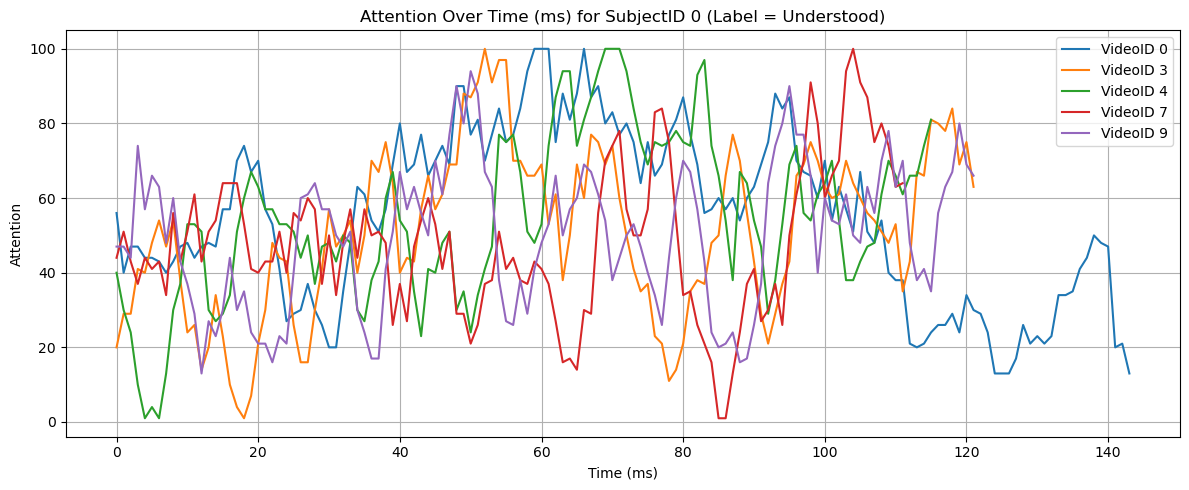

Average Mediation VideoID 0: 53.826388888888886
Average Mediation VideoID 3: 51.84426229508197
Average Mediation VideoID 4: 47.474137931034484
Average Mediation VideoID 7: 50.24107142857143
Average Mediation VideoID 9: 47.27049180327869


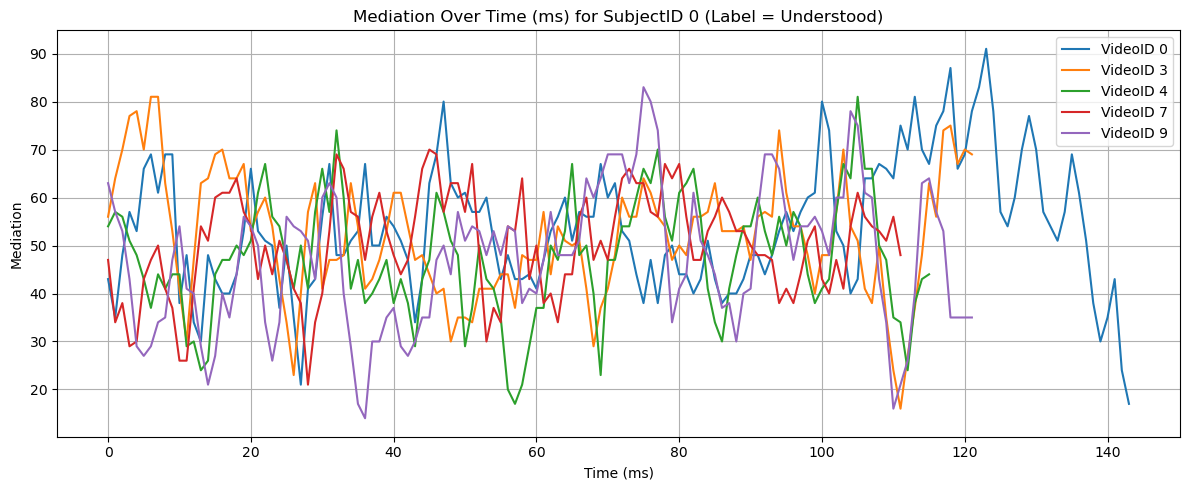

Average Raw VideoID 0: 46.986111111111114
Average Raw VideoID 3: 34.71311475409836
Average Raw VideoID 4: 30.00862068965517
Average Raw VideoID 7: 28.267857142857142
Average Raw VideoID 9: 37.28688524590164


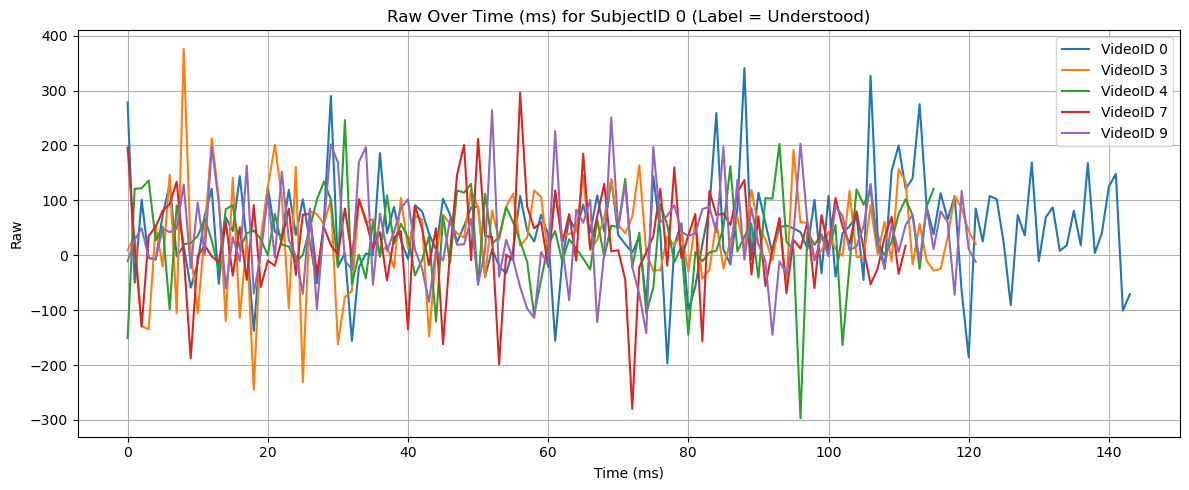

Average Delta VideoID 0: 544315.0972222222
Average Delta VideoID 3: 600823.6885245901
Average Delta VideoID 4: 546628.0172413794
Average Delta VideoID 7: 477990.0089285714
Average Delta VideoID 9: 602249.393442623


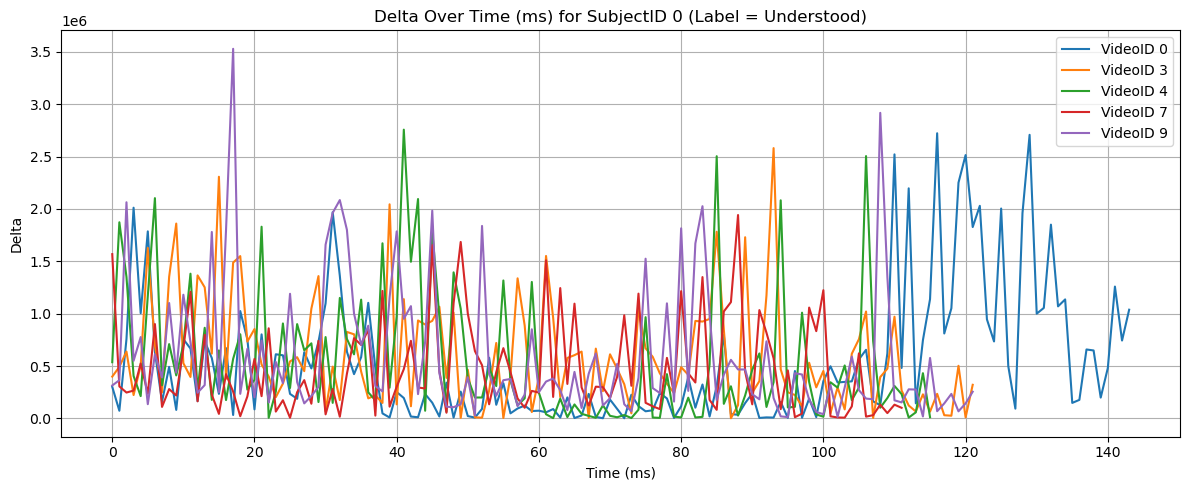

Average Theta VideoID 0: 124965.59027777778
Average Theta VideoID 3: 162653.3606557377
Average Theta VideoID 4: 126893.94827586207
Average Theta VideoID 7: 114145.27678571429
Average Theta VideoID 9: 130773.5


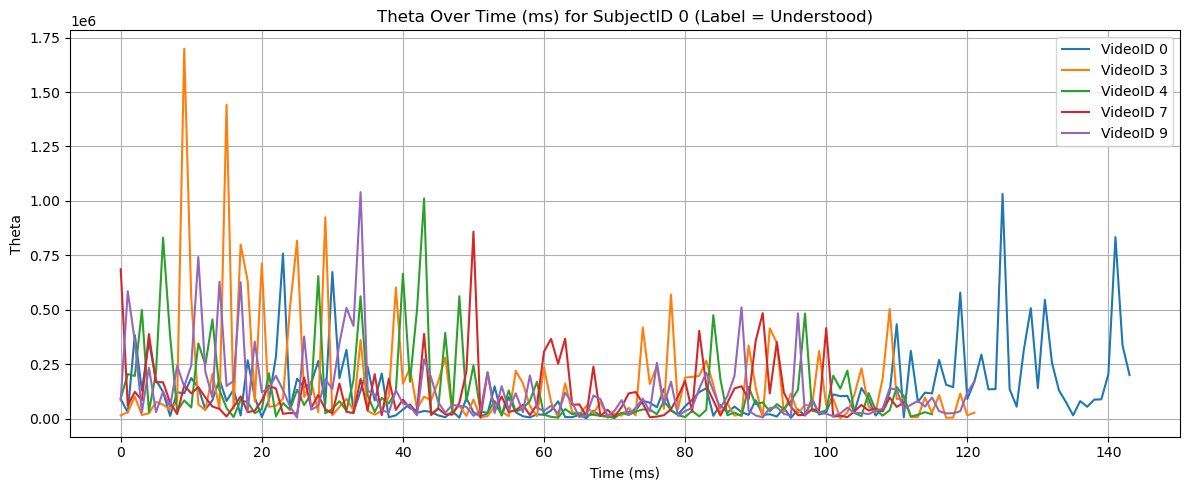

Average Alpha1 VideoID 0: 36693.70138888889
Average Alpha1 VideoID 3: 33367.27868852459
Average Alpha1 VideoID 4: 23113.844827586207
Average Alpha1 VideoID 7: 25727.714285714286
Average Alpha1 VideoID 9: 26457.377049180326


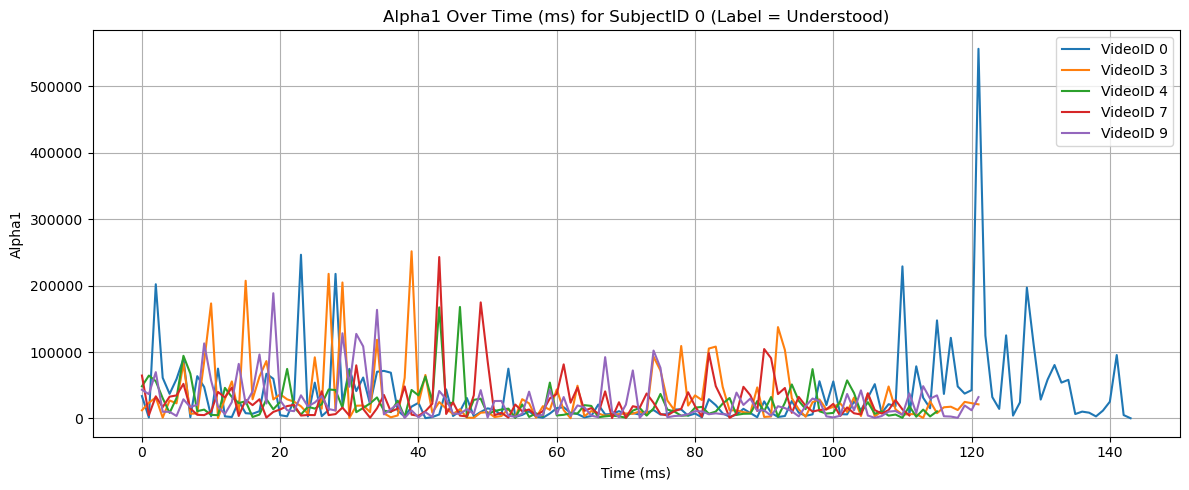

Average Alpha2 VideoID 0: 25875.29861111111
Average Alpha2 VideoID 3: 26281.5
Average Alpha2 VideoID 4: 17017.05172413793
Average Alpha2 VideoID 7: 16241.580357142857
Average Alpha2 VideoID 9: 20616.622950819674


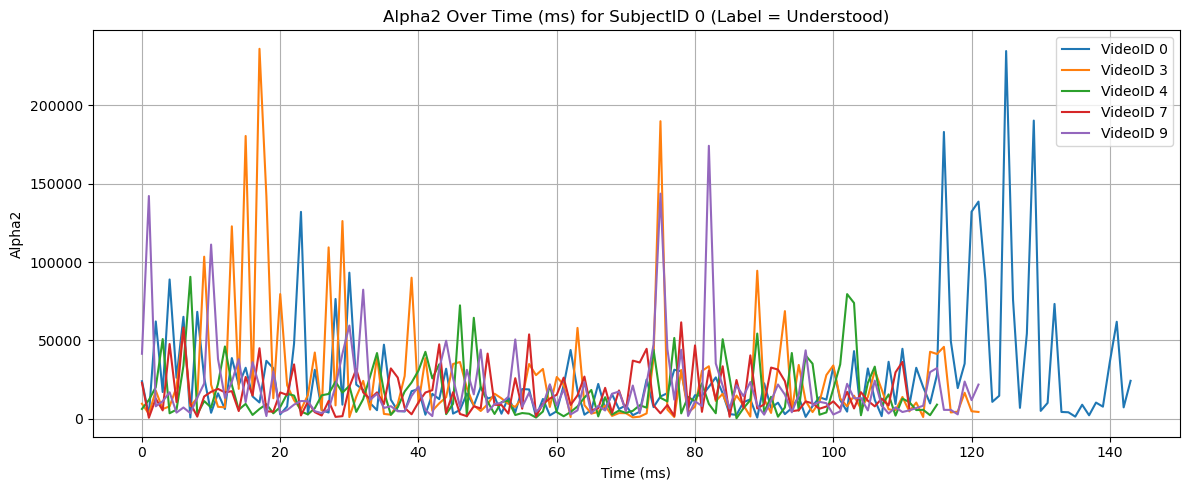

Average Beta1 VideoID 0: 20108.791666666668
Average Beta1 VideoID 3: 17224.27868852459
Average Beta1 VideoID 4: 15955.879310344828
Average Beta1 VideoID 7: 15278.625
Average Beta1 VideoID 9: 20124.450819672133


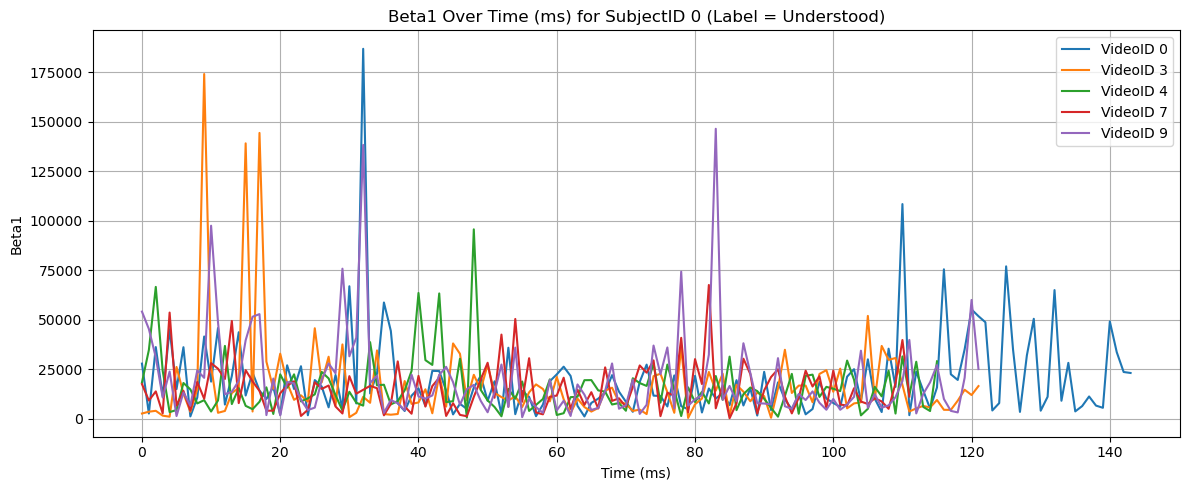

Average Beta2 VideoID 0: 40268.76388888889
Average Beta2 VideoID 3: 43706.524590163935
Average Beta2 VideoID 4: 36427.83620689655
Average Beta2 VideoID 7: 37795.61607142857
Average Beta2 VideoID 9: 29241.04098360656


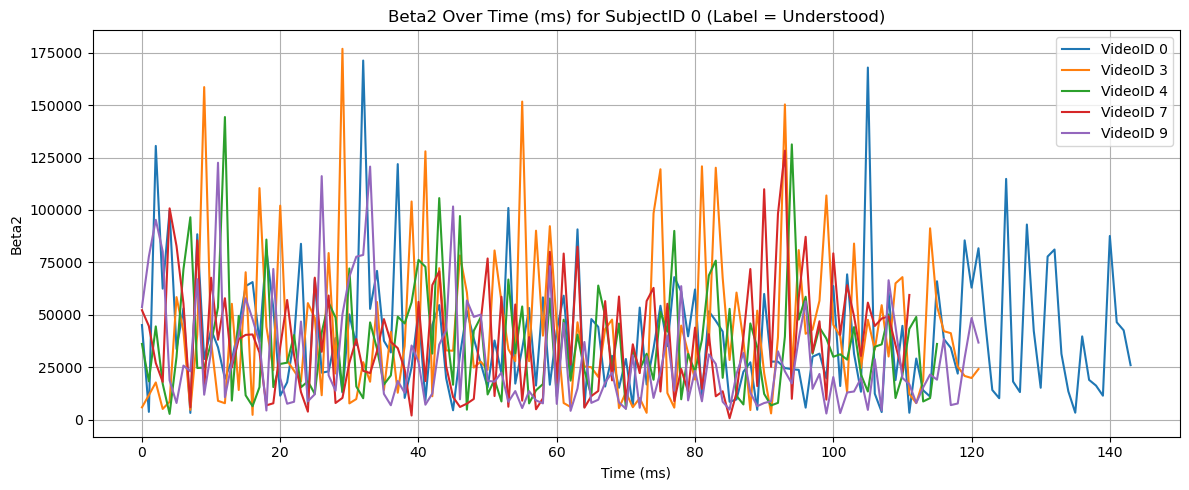

Average Gamma1 VideoID 0: 40729.28472222222
Average Gamma1 VideoID 3: 41438.2131147541
Average Gamma1 VideoID 4: 36024.81896551724
Average Gamma1 VideoID 7: 36331.42857142857
Average Gamma1 VideoID 9: 28180.090163934427


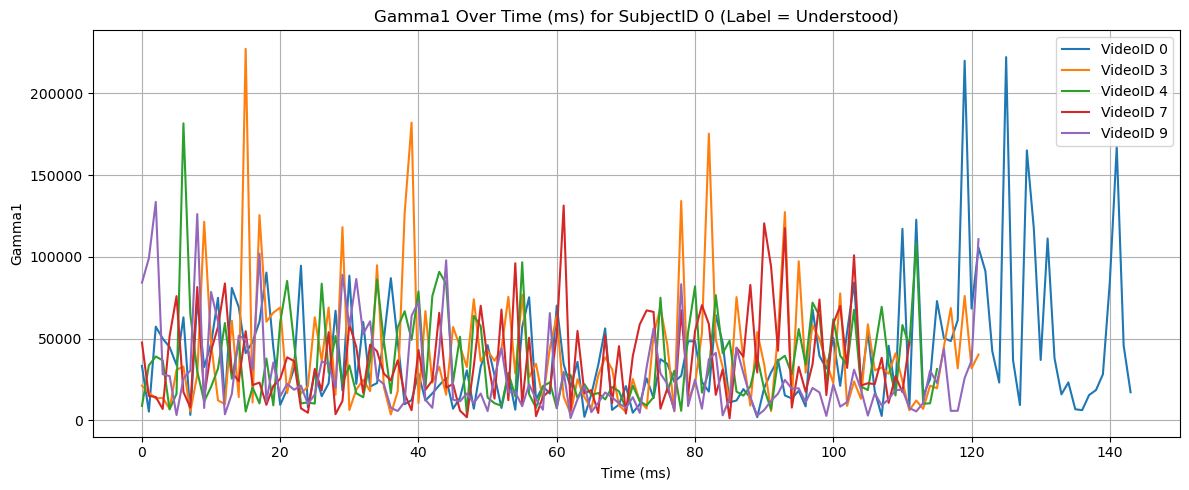

Average Gamma2 VideoID 0: 16817.0625
Average Gamma2 VideoID 3: 16558.631147540982
Average Gamma2 VideoID 4: 14752.655172413793
Average Gamma2 VideoID 7: 13718.25
Average Gamma2 VideoID 9: 11692.38524590164


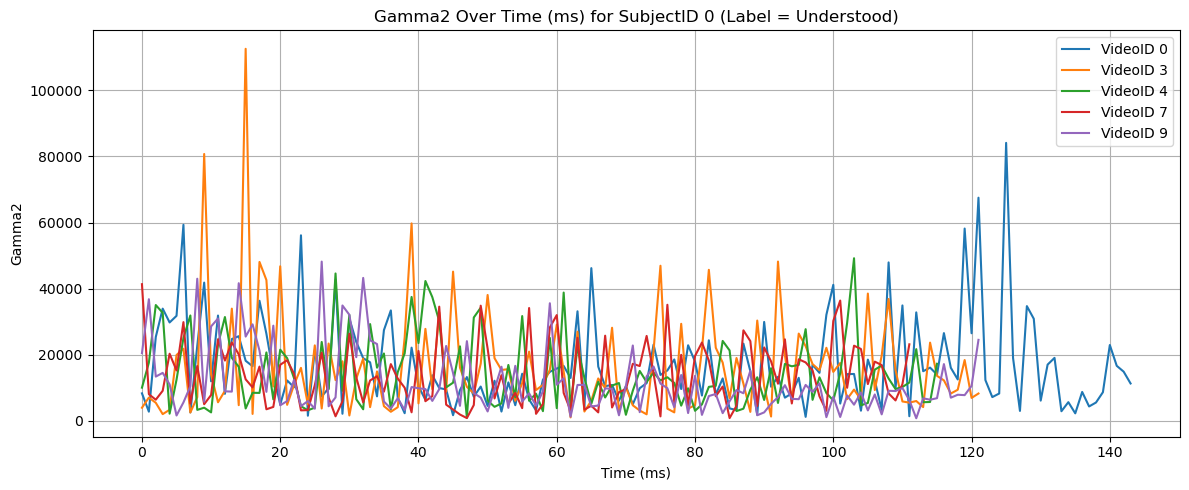

In [24]:
# Plotting each column over time of Subject 0 for understood videos
cols = df_new.columns.tolist()[3:-2]

plt.figure(figsize=(12, 8))

video_ids = df_understood[df_understood['SubjectID'] == '0']['VideoID'].unique()

for col in cols:
    plt.figure(figsize=(12, 5))
    for i in video_ids:
        df_filtered = df_understood[(df_understood['SubjectID'] == '0') & (df_understood['VideoID'] == i)]
        print(f'Average {col} VideoID {i}:', df_filtered[col].mean())
        plt.plot(df_filtered['timepoint'], df_filtered[col], label=f'VideoID {i}')
    
    plt.grid(True)
    plt.xlabel('Time (ms)')
    plt.ylabel(col)
    plt.title(f'{col} Over Time (ms) for SubjectID 0 (Label = Understood)')
    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

We look at the EEG data graphs for Subject 0. From the plots above we can see that Attention is slightly higher for confused videos compared to understood. Additionally mediation for confused videos seem to vary more over time compared to mediation for understood videos. Spikes in the data are observable in the middle for some columns while others only see spikes towards the beginning and end of the time series.

We could continue to look at the data for each subject, we want our predictive task to be able to train a machine learning algorithm to classify whether a subject marks the video as confused or understood based on the EEG data provided. 